#### 1. Motivation<br>
Covid-19 started in November 2019 and started to spread across the world killing 3.74 million people. To curb the spread were to wear masks and maintain 6 feet distance. Although vaccines are available now and the cases have come down in some few countries, many countries are still struggling. In order to aid in stopping the spread and identify individuals not following the safety policies, we aim to build an Object Detection and Convolution Neural Network based face mask and social distance detection system. The dataset to be used contains numerous images of instances where people are with and without mask and the model aims to identify people violating safety policies and flag the images with violation concerns. <br>


**Objective:**

Identiying if a person is wearing facemask or not and violating any social distance norms.

In [48]:
## Importing libraries
import pandas as pd
import numpy as np
import cv2
import os
import glob
from scipy.spatial import distance
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
# from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
# import tf.keras.preprocessing.image.ImageDataGenerator

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
ls

Face_Mask_Dataset/
face_mask_detection/
facemask-detection-using-tensorflow-2.ipynb


### Getting the directories, Path and Data

In [4]:
path = "./Face_Mask_Dataset"

In [5]:
dataset = {
    "image_path": [],
    "mask_status": [],
    "where": []
}

for where in ['Test', 'Train', 'Validation']:
    for status in ['WithMask', 'WithoutMask']:
        for image in glob.glob(path+ "/" +where+"/"+status+"/"+"*.png"):
            dataset["image_path"].append(image)
            dataset["mask_status"].append(status)
            dataset["where"].append(where)
            
dataset = pd.DataFrame(dataset)
dataset.head()

,image_path,mask_status,where
0,./Face_Mask_Dataset/Test/WithMask/Augmented_30...,WithMask,Test
1,./Face_Mask_Dataset/Test/WithMask/Augmented_61...,WithMask,Test
2,./Face_Mask_Dataset/Test/WithMask/Augmented_14...,WithMask,Test
3,./Face_Mask_Dataset/Test/WithMask/Augmented_71...,WithMask,Test
4,./Face_Mask_Dataset/Test/WithMask/Augmented_70...,WithMask,Test


### Face Detection using HAAR Cascade Algorithm

##### Drawbacks:

We can observe that Default face detection Haar Cascading that we choose doesnt do a good job in identifying the faces. (Will replace this with other algorithms)

### Detecting Social Distance

In [6]:
if len(detected_face) >= 2:
    # Track to check for violation of social distance violation
    label = [0 for i in range(len(detected_face))]
    
    # Getting the distance from one image to rest of the image  
    for i in range(len(detected_face)-1):
        for j in range(i+1, len(detected_face)):
            # [:2] gets only x, y co ordinates
            dist = distance.euclidean(detected_face[i][:2], detected_face[j][:2])
            # Checking if the distance is less than 6 feet 
            if dist < 130:
                # If less than 6 feet, flag the respective images
                label[i] = 1
                label[j] = 1
    
    # Coloring the image
    new_image = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    
    # Coloring the rectangle around the image
    for i in range(len(detected_face)):
        (x, y, w, h) = detected_face[i]
        if label[i] == 1:
            # If its 1, then the distance is less than 6 feet so mark red
            cv2.rectangle(new_image, (x, y), (x+w, y+h), (255, 0, 0), 2)
        else:
            # If not mark green 
            cv2.rectangle(new_image, (x, y), (x+w, y+h), (0, 255, 0), 2)
         
    plt.figure(figsize = (10, 10))
    plt.imshow(new_image)

NameError: name 'detected_face' is not defined

Note: Red showing that they are not 6 feet apart. Green shows that they are 6 feet apart

### Visualisations

With Mask: 5909
Without Mask: 5883


<AxesSubplot:xlabel='mask_status', ylabel='count'>

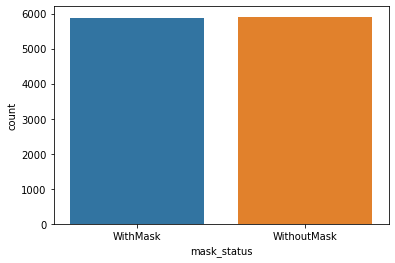

In [7]:
## Checking for total number of images in the dataset
print(f"With Mask:", dataset.value_counts("mask_status")[0])
print(f"Without Mask:", dataset.value_counts("mask_status")[1])

## Plotting the numbers
sns.countplot(x = dataset["mask_status"])

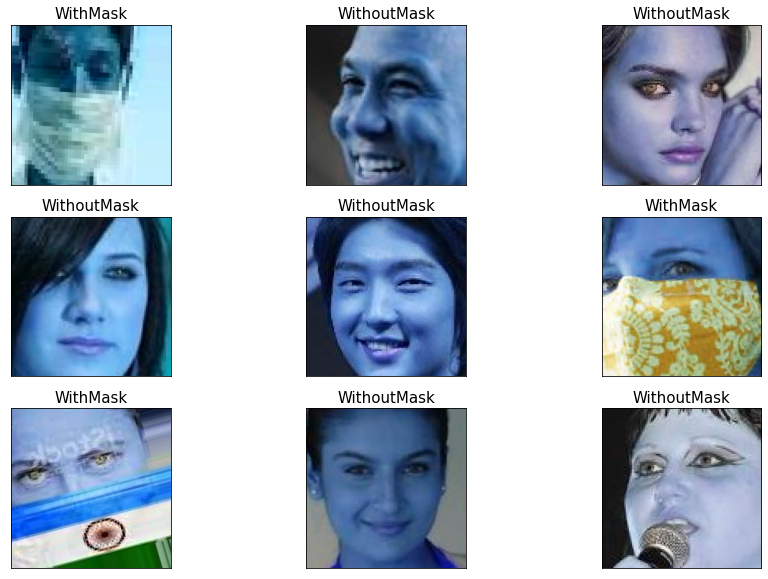

In [8]:
plt.figure(figsize = (15, 10))

for i in range(9):
    random = np.random.randint(1, len(dataset))
    plt.subplot(3, 3, i+1)
    plt.imshow(cv2.imread(dataset.loc[random,"image_path"]))
    plt.title(dataset.loc[random,"mask_status"], size = 15)
    plt.xticks([])
    plt.yticks([])
    
plt.show()

In [9]:
## Splitting train test and Validation Dataset
train_df = dataset[dataset["where"] == "Train"]
test_df = dataset[dataset["where"] == "Test"]
valid_df = dataset[dataset["where"] == "Validation"]

print(train_df.head(10))

## Shuffling the dataset 
train_df = train_df.sample(frac = 1)
test_df = test_df.sample(frac = 1)
valid_df = valid_df.sample(frac = 1)

print("\n After Shuffling \n")
print(train_df.head(10))

                                             image_path mask_status  where
992          ./Face_Mask_Dataset/Train/WithMask/348.png    WithMask  Train
993   ./Face_Mask_Dataset/Train/WithMask/Augmented_1...    WithMask  Train
994   ./Face_Mask_Dataset/Train/WithMask/Augmented_7...    WithMask  Train
995         ./Face_Mask_Dataset/Train/WithMask/1810.png    WithMask  Train
996   ./Face_Mask_Dataset/Train/WithMask/Augmented_3...    WithMask  Train
997   ./Face_Mask_Dataset/Train/WithMask/Augmented_5...    WithMask  Train
998          ./Face_Mask_Dataset/Train/WithMask/412.png    WithMask  Train
999   ./Face_Mask_Dataset/Train/WithMask/Augmented_8...    WithMask  Train
1000  ./Face_Mask_Dataset/Train/WithMask/Augmented_7...    WithMask  Train
1001  ./Face_Mask_Dataset/Train/WithMask/Augmented_2...    WithMask  Train

 After Shuffling 

                                              image_path  mask_status  where
10081     ./Face_Mask_Dataset/Train/WithoutMask/2351.png  WithoutMask  Train
2

### Visualising the distribution of train test and validation set

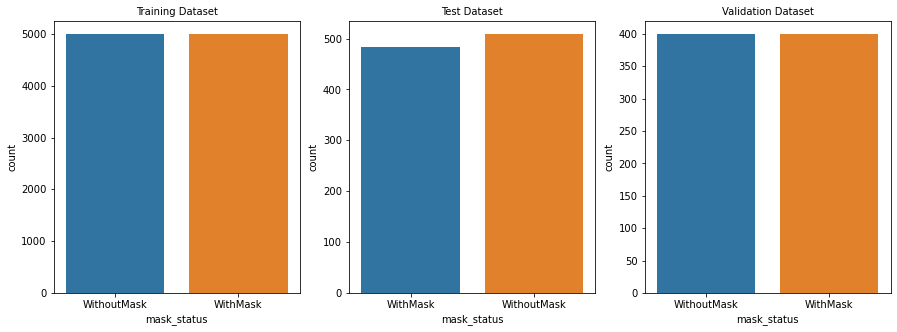

In [10]:
plt.figure(figsize = (15, 5))
plt.subplot(1, 3, 1)
sns.countplot(x = train_df["mask_status"])
plt.title("Training Dataset", size = 10)

plt.subplot(1, 3, 2)
sns.countplot(x = test_df["mask_status"])
plt.title("Test Dataset", size = 10)

plt.subplot(1, 3, 3)
sns.countplot(x = valid_df["mask_status"])
plt.title("Validation Dataset", size = 10)

plt.show()

In [11]:
train_df = train_df.reset_index().drop("index", axis = 1)
train_df.head()

,image_path,mask_status,where
0,./Face_Mask_Dataset/Train/WithoutMask/2351.png,WithoutMask,Train
1,./Face_Mask_Dataset/Train/WithMask/Augmented_2...,WithMask,Train
2,./Face_Mask_Dataset/Train/WithoutMask/3976.png,WithoutMask,Train
3,./Face_Mask_Dataset/Train/WithoutMask/2919.png,WithoutMask,Train
4,./Face_Mask_Dataset/Train/WithMask/689.png,WithMask,Train


In [114]:
## Reading all the image into a list and changing the size of the image to (150,150)
data = []
image_size = 250

for i in range(len(train_df)):
    ## Converting the image into grayscale
    img_array = cv2.imread(train_df["image_path"][i])

    ## Resizing the array
    new_image_array = cv2.resize(img_array, (image_size, image_size))

    ##Encoding the image with the label
    if train_df["mask_status"][i] == "WithMask":
        data.append([new_image_array, 1])
    else:
        data.append([new_image_array, 0])
        
data = data[:100]

In [116]:
data = np.array(data)

/var/folders/4k/2q_gdnx53plgtrz7y4n8qyd80000gn/T/ipykernel_59019/4012140830.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array(data)


In [117]:
data[0][0].shape

(250, 250, 3)

In [115]:
## Shuffling the data to make sure everything is not in order
np.random.shuffle(data)

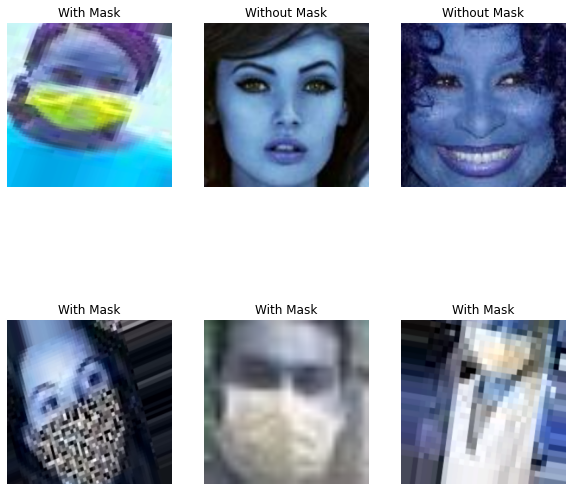

In [96]:
## Looking at the training samples

fig, ax = plt.subplots(2, 3, figsize=(10, 10))

for row in range(2):
    for col in range(3):
        image_index = row*100+col
        
        ax[row, col].axis("off")
        ax[row,col].imshow(data[image_index][0], cmap = "gray")
    
        if data[image_index][1] == 0:
            ax[row, col].set_title("Without Mask")
        else:
            ax[row, col].set_title("With Mask")
            
plt.show()

In [17]:
# datagen = ImageDataGenerator(rescale = 1./255)

# train_generator=datagen.flow_from_dataframe(
# dataframe=train_df,
# directory="../input",
# x_col="image_path",
# y_col="mask_status",
# batch_size=80,
# seed=42,
# shuffle=False,
# class_mode="binary",
# target_size=(150,150))

### Preparing data to be loaded into the Model

In [97]:
X = []
y = []

## Seperating X and y
for image in data:
    X.append(image[0])
    y.append(image[1])
    
## Converting X and y to numpy array as Tensorflow accepts only numpy arrays
X = np.array(X)
y = np.array(y)

In [119]:
### Normalizing the data
# X = X/255

### Train Test Split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Building the model

In [111]:
model = keras.Sequential()
model.add(keras.Input(shape=(250, 250, 3)))
model.add(layers.Conv2D(64, 5, activation="relu"))
model.add(layers.Conv2D(64, 3, activation="relu"))
model.add(layers.MaxPooling2D(3))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation = "relu"))
model.add(layers.Dense(1, activation = "sigmoid"))

# Finally, we add a classification layer.
# model.add(layers.Dense(1))
# model.summary()

In [112]:
model.compile(loss='CategoricalCrossentropy')

In [120]:
X_train = X_train.reshape(len(X_train), X_train.shape[1], X_train.shape[2], 3)
X_val = X_val.reshape(len(X_val), X_val.shape[1], X_val.shape[2], 3)

In [105]:
X_train.shape

(8000, 250, 250, 3)

In [121]:
history = model.fit(X_train, y_train, epochs=5)

Epoch 1/5
 21/250 [=>............................] - ETA: 19:23 - loss: 0.0000e+00

KeyboardInterrupt: 

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (32, 148, 148, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (32, 146, 146, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (32, 48, 48, 64)          0         
_________________________________________________________________
flatten (Flatten)            (32, 147456)              0         
_________________________________________________________________
dense (Dense)                (32, 128)                 18874496  
_________________________________________________________________
dense_1 (Dense)              (32, 1)                   129       
Total params: 18,912,193
Trainable params: 18,912,193
Non-trainable params: 0
____________________________________________

In [26]:
model.evaluate(X_val, y_val)

63/63 [==============================] - 22s 350ms/step - loss: 0.0894


0.08938151597976685

In [27]:
prediction = model.predict_classes(X_val)

/Users/guanzhaoli/opt/anaconda3/envs/TF2/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:454: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [28]:
print(classification_report(y_val, prediction))
print(confusion_matrix(y_val, prediction))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       958
           1       0.99      0.96      0.97      1042

    accuracy                           0.97      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000

[[944  14]
 [ 44 998]]


In [40]:
from trulens.nn.attribution import IntegratedGradients
from trulens.visualizations import MaskVisualizer
import PIL
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions

In [45]:
from trulens.nn.models import get_model_wrapper
model_wrapped = get_model_wrapper(model)

# Create the attribution measure.
ig_computer = IntegratedGradients(model_wrapped, resolution=10)
# Calculate the input attributions.
with PIL.Image.open('husky.jpeg') as img:
    plt.imshow(img)
    x = np.array(img.resize((32,32), PIL.Image.ANTIALIAS))[np.newaxis]
    x_pp = preprocess_input(np.array(x, copy=True))
    input_attributions = ig_computer.attributions(x_pp)
# Visualize the attributions as a mask on the original image.
visualizer = MaskVisualizer(blur=10, threshold=0.95)
visualization = visualizer(input_attributions, x_pp)

INFO: lib level=1
INFO: root level=30
INFO: Detected tensorflow backend for <class 'tensorflow.python.keras.engine.sequential.Sequential'>.
INFO: Changing backend from None to Backend.TENSORFLOW.
INFO: If this seems incorrect, you can force the correct backend by passing the `backend` parameter directly into your get_model_wrapper call.


ValueError: Model must be an instance of `Backend.TENSORFLOW.models.Model`.

(you may be seeing this error if you passed a `tensorflow.keras` model while using the 'keras' backend or vice-versa)